# An introduction to Gradient Descent

- From [Implementation of gradient-descent-in-python](https://medium.com/coinmonks/implementation-of-gradient-descent-in-python-a43f160ec521) at [medium.com](https://medium.com) by Deepak Battini.
- And [Implement Gradient Descent in Python](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1) at [TowardDatascience.com](https://towardsdatascience.com) by Rohan Joseph.
- And [A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/) at [machinelearningmastery.com](https://machinelearningmastery.com) by  Jason Brownlee

Updated by [John Fogarty](https://github.com/jfogarty) for Python 3.6 and [Base2 MLI](https://github.com/base2solutions/mli) and [colab](https://colab.research.google.com) standalone evaluation.

Every machine learning engineer is always looking to improve their model’s performance. This is where optimization, one of the most important fields in machine learning, comes in. Optimization allows us to select the best parameters, associated with the machine learning algorithm or method we are using, for our problem case. There are several types of optimization algorithms. Perhaps the most popular one is the Gradient Descent optimization algorithm. The first encounter of Gradient Descent for many machine learning engineers is in their introduction to neural networks. In this tutorial, we will teach you how to implement Gradient Descent from scratch in python. 

But first, what exactly is Gradient Descent?

## What is Gradient Descent?

It is an optimization algorithm to find the minimum of a function. We start with a random point on the function and move in the negative direction of the gradient of the function to reach the local/global minima.

<figure>
  <br><center>
    <img src="../images/homer-descending.gif" />
    <figcaption>Homer descending!</figcaption>     
  </center>
</figure>

Gradient Descent is an optimization algorithm that helps machine learning models converge at a minimum value through repeated steps. Essentially, gradient descent is used to minimize a function by finding the value that gives the lowest output of that function. Often times, this function is usually a loss function. Loss functions measure how bad our model performs compared to actual occurrences. Hence, it only makes sense that we should reduce this loss. One way to do this is via Gradient Descent.

A simple gradient Descent Algorithm is as follows:

1. Obtain a function to minimize F(x)
1. Initialize a value x from which to start the descent or optimization from
1. Specify a **learning rate** that will determine how much of a step to descend by or how quickly you converge to the minimum value
1. Obtain the derivative of that value x (the descent)
1. Proceed to descend by the derivative of that value multiplied by the learning rate
1. Update the value of x with the new value descended to
1. Check your stop condition to see whether to stop
1. If condition satisfied, stop. If not, proceed to step 4 with the new x value and keep repeating algorithm

### Heres an Example by hand :

Question : Find the local minima of the function: $y=(x+5)^2$ starting from the point $x=3$
    
<figure>
  <br><center>
    <img src="../images/graph_x+5_squared.png" />
  </center>
</figure>

### Solution

We know the answer just by looking at the graph. $y = (x+5)^2$ reaches it’s minimum value when $x = -5$ (i.e when $x=-5$, $y=0$). Hence x=-5 is the 
local and global minima of the function.

Now, let’s see how to obtain the same numerically using gradient descent.

- Step 1 : Initialize x =3. 
$$x_0 = 3$$
Then, find the gradient of the function, 
$$
  \frac{dy}{dx} = \frac{dy}{dx}(x+5)^2 
                = 2(x+5) 
$$.
- Step 3 : Move in the direction of the negative of the gradient (Why?). But wait, how much to move? For that, we require a learning rate. Let us assume the learning rate → 0.01 (this is often called $\alpha$)

$$
\alpha = 0.01
$$




- Step 4 : Let’s perform some iterations of gradient descent:

<figure>
  <br><center>
    <img src="../images/gradient_descent_by_hand.png" />
  </center>
</figure>

- Step 5 : We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

Let us set a precision variable in our algorithm which calculates the difference between two consecutive “$x$” values.

If the difference between $x$ values from 2 consecutive iterations is lesser than the precision we set, stop the algorithm!

# Now for some Python 

**Usage NOTE!** Use `Shift+Enter` to step through this notebook, executing the code as you go.

In [39]:
f  = lambda x: (x + 5)**2  # The function we are trying to minimize (notice we don't actually use it!)
df = lambda x: 2*(x+5)     # Gradient of our function

rate      = 0.01  # Learning rate
precision = 0.000001 #This tells us when to stop the algorithm
previous_step_size = 1 #
max_iters = 10000 # maximum number of iterations

In [40]:
cur_x     = 3 # The algorithm starts at x=3
iters = 0 #iteration counter
while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x #Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x) #Grad descent
    previous_step_size = abs(cur_x - prev_x) #Change in x
    iters = iters+1 #iteration count
    print("Iteration",iters,"\nX value is",cur_x) #Print iterations

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

In [41]:
print(f"The local minimum occurs at {cur_x:0.4f}")
print(f"The number of iterations to converge was {iters}")

The local minimum occurs at -5.0000
The number of iterations to converge was 595


### Output

From the output above, we can observe the $x$ values for the first 10 iterations- which can be cross checked with our manual calculations. The algorithm runs for 595 iterations before it terminates. 

**Well that was fun.  Let's try another one.**

## Gradient Descent in Python -- with Graphs!

Here, we will implement a simple representation of gradient descent using python.
We will create an arbitrary loss function and attempt to find a local minimum value for that function.

Our function $f(x)$ will be :
    
$$f(x) = x^2 - 3x^2 + 7$$

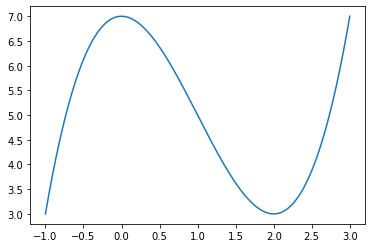

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# creating the function and plotting it 

function = lambda x: (x ** 3)-(3 *(x ** 2))+7

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,500)

#Plot the curve
plt.plot(x, function(x))
plt.show()

Note that while this function is defined for $x$ in $[-\infty, +\infty]$ it only has a local minimum from $x$ in $[0.0, 2.0]$.

We will then proceed to make two functions for the gradient descent implementation:

- The first is a derivative function: This function takes in a value of x and returns its derivative based on the initial function we specified. It is shown below:

In [43]:
def deriv(x):
    
    '''
    Description: This function takes in a value of x and returns its derivative based on the 
    initial function we specified.
    
    Arguments:
    
    x - a numerical value of x 
    
    Returns:
    
    x_deriv - a numerical value of the derivative of x
    
    '''
    
    x_deriv = 3* (x**2) - (6 * (x))
    return x_deriv

- The second is a Step function: This is the function where the actual gradient descent takes place. This function takes in an initial or previous value for x, updates it based on steps taken via the learning rate and outputs the most minimum value of x that reaches the stop condition. For our stop condition, we are going to use a precision stop. This means that when the absolute difference between our old and updated x is greater than a value, the algorithm should stop. The function will also print out the minimum value of x as well as the number of steps or descents it took to reach that value.

This function is shown below:

In [44]:
def step(x_new, x_prev, precision, l_r):
    
    '''
    Description: This function takes in an initial or previous value for x, updates it based on 
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.
    
    Arguments:
    
    x_new - a starting value of x that will get updated based on the learning rate
    
    x_prev - the previous value of x that is getting updated to the new one
    
    precision - a precision that determines the stop of the stepwise descent 
    
    l_r - the learning rate (size of each descent step)
    
    Output:
    
    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area
    
    '''
    
    # create empty lists where the updated values of x and y wil be appended during each iteration
    
    x_list, y_list = [x_new], [function(x_new)]
    # keep looping until your desired precision
    while abs(x_new - x_prev) > precision:
        
        # change the value of x
        x_prev = x_new
        
        # get the derivation of the old value of x
        d_x = - deriv(x_prev)
        
        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (l_r * d_x)
        
        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)
        
        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(function(x_new))

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    
    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Next, we proceed to plot the gradient descent path as shown below:

Local minimum occurs at: 2.001831460188019
Number of steps: 17


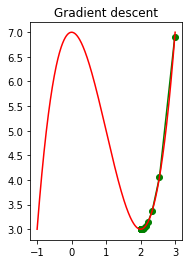

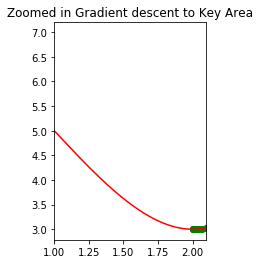

In [45]:
#Implement gradient descent (all the arguments are arbitrarily chosen)

step(2.99, 0, 0.001, 0.05)

The importance of Gradient Descent in Machine Learning is one that will be encountered all through your machine learning journey. This is why it is imperative that you understand the inner workings of this algorithm. This tutorial has introduced you to the simplest form of the gradient descent algorithm as well as its implementation in python. Now, you have an intuitive understanding of this algorithm and you are ready to apply it to real world problems.

## A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size

Stochastic gradient descent is the dominant method used to train deep learning models.

There are three main variants of gradient descent and it can be confusing which one to use.

In this post, you will discover the one type of gradient descent you should use in general and how to configure it.

This is what we'll discuss here:

- What gradient descent is and how it works from a high level.
- What batch, stochastic, and mini-batch gradient descent are and the benefits and limitations of each method.
- That mini-batch gradient descent is the go-to method and how to configure it on your applications.

## Contrasting the 3 Types of Gradient Descent

Gradient descent can vary in terms of the number of training patterns used to calculate error; that is in turn used to update the model.

The number of patterns used to calculate the error includes how stable the gradient is that is used to update the model. We will see that there is a tension in gradient descent configurations of computational efficiency and the fidelity of the error gradient.

The three main flavors of gradient descent are batch, stochastic, and mini-batch.

Let’s take a closer look at each.

### What is Stochastic Gradient Descent?

Stochastic gradient descent, often abbreviated **SGD**, is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the training dataset.

The update of the model for each training example means that stochastic gradient descent is often called an online machine learning algorithm.

#### Upsides
- The frequent updates immediately give an insight into the performance of the model and the rate of improvement.
- This variant of gradient descent may be the simplest to understand and implement, especially for beginners.
- The increased model update frequency can result in faster learning on some problems.
- The noisy update process can allow the model to avoid local minima (e.g. premature convergence).

#### Downsides
- Updating the model so frequently is more computationally expensive than other configurations of gradient descent, taking significantly longer to train models on large datasets.
- The frequent updates can result in a noisy gradient signal, which may cause the model parameters and in turn the model error to jump around (have a higher variance over training epochs).
- The noisy learning process down the error gradient can also make it hard for the algorithm to settle on an error minimum for the model.

### What is Batch Gradient Descent?

Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

One cycle through the entire training dataset is called a training epoch. Therefore, it is often said that batch gradient descent performs model updates at the end of each training epoch.

#### Upsides
- Fewer updates to the model means this variant of gradient descent is more computationally efficient than stochastic gradient descent.
- The decreased update frequency results in a more stable error gradient and may result in a more stable convergence on some problems.
- The separation of the calculation of prediction errors and the model update lends the algorithm to parallel processing based implementations.

#### Downsides
- The more stable error gradient may result in premature convergence of the model to a less optimal set of parameters.
- The updates at the end of the training epoch require the additional complexity of accumulating prediction errors across all training examples.
- Commonly, batch gradient descent is implemented in such a way that it requires the entire training dataset in memory and available to the algorithm.
- Model updates, and in turn training speed, may become very slow for large datasets.

## What is Mini-Batch Gradient Descent?
Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.



#### Upsides
- The model update frequency is higher than batch gradient descent which allows for a more robust convergence, avoiding local minima.
- The batched updates provide a computationally more efficient process than stochastic gradient descent.
- The batching allows both the efficiency of not having all training data in memory and algorithm implementations.

#### Downsides
- Mini-batch requires the configuration of an additional “mini-batch size” hyperparameter for the learning algorithm.
- Error information must be accumulated across mini-batches of training examples like batch gradient descent.

### How to Configure Mini-Batch Gradient Descent

Mini-batch gradient descent is the recommended variant of gradient descent for most applications, especially in deep learning.

Mini-batch sizes, commonly called “batch sizes” for brevity, are often tuned to an aspect of the computational architecture on which the implementation is being executed. Such as a power of two that fits the memory requirements of the GPU or CPU hardware like 32, 64, 128, 256, and so on.

Batch size is a slider on the learning process.

- Small values give a learning process that converges quickly at the cost of noise in the training process.
- Large values give a learning process that converges slowly with accurate estimates of the error gradient.

**Tip 1**: A good default for batch size might be 32.

… [batch size] is typically chosen between 1 and a few hundreds, e.g. [batch size] = 32 is a good default value, with values above 10 taking advantage of the speedup of matrix-matrix products over matrix-vector products.

— From [Practical recommendations for gradient-based training of deep architectures, 2012](https://arxiv.org/abs/1206.5533)


**Tip 2**: It is a good idea to review learning curves of model validation error against training time with different batch sizes when tuning the batch size.

… it can be optimized separately of the other hyperparameters, by comparing training curves (training and validation error vs amount of training time), after the other hyper-parameters (except learning rate) have been selected.

**Tip 3**: Tune batch size and learning rate after tuning all other hyperparameters.

… [batch size] and [learning rate] may slightly interact with other hyper-parameters so both should be re-optimized at the end. Once [batch size] is selected, it can generally be fixed while the other hyper-parameters can be further optimized (except for a momentum hyper-parameter, if one is used).

### End of note.